In [10]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter 
plt.rcParams['animation.ffmpeg_path'] = "ffmpeg-6.1.1-full_build/bin/ffmpeg.exe"

In the next cell, we copy the code that creates the fern coordinates (see *barnsley_fern.ipynb* file).

In [11]:
N = 10**4
X, Y = [0], [0]
rdm = np.random.uniform(0,1,N)
for i in range(1, rdm.size):
    if rdm[i]<0.01: x, y = 0, 0.16*Y[i-1]
    elif rdm[i]<0.86: x, y = 0.85*X[i-1]+0.04*Y[i-1], -0.04*X[i-1]+0.85*Y[i-1]+1.6
    elif rdm[i]<0.93: x, y = 0.2*X[i-1]-0.26*Y[i-1], 0.23*X[i-1]+0.22*Y[i-1]+1.6
    else: x, y = -0.15*X[i-1]+0.28*Y[i-1], 0.26*X[i-1]+0.24*Y[i-1]+0.44
    X.append(x) ; Y.append(y)

Here is the animation. It will be locally saved in a *fern_animation.mp4* file. It can take some time, be patient...

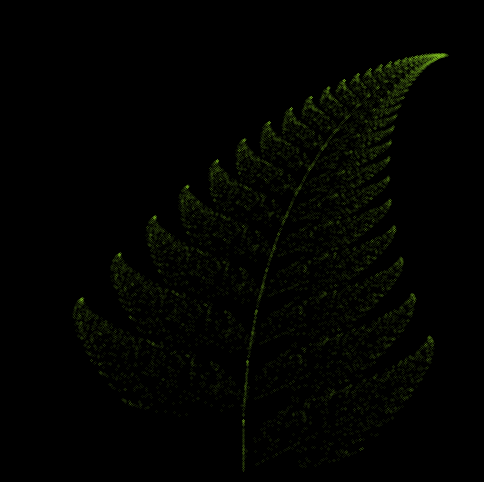

In [12]:
#parameters of the figure
plt.style.use("dark_background")
(fig, ax) = plt.subplots(1,1,figsize=(6,6))
ax.set_xlim(-3,3) ; ax.set_ylim(0.4,11) ; ax.set_xticks([]) ; ax.set_yticks([])
[ax.spines[c].set_color('black') for c in ['top','bottom','left','right']]

L = ax.plot([], [], ".", c="greenyellow", ms=0.1)[0]
x_, y_ = [], [] #we will iteratively add x and y data

writer = FFMpegWriter(fps=10)
with writer.saving(fig, "fern_animation.mp4", 100):
    for i in range(1, N):
        x_.append(X[i]) ; y_.append(Y[i])
        L.set_data(x_, y_) #at each iteration, a new point is plotted
        writer.grab_frame()